## ***E-commerce Sales Data Analysis***

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\ecommerce_sales_data.csv\ecommerce_sales_data.csv")
df.head()

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,766.85,4,3067.40,81af1248-afff-46ee-a091-81cf33d0d957,39,Male,25/05/2024,6:28:14
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,331.42,4,1325.68,f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,Male,04/05/2024,19:37:36
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,708.10,10,7081.00,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,Female,07/05/2024,17:54:42
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,774.09,2,1548.18,578e2d1a-d92a-449d-8eeb-b704110b2975,51,Female,23/05/2024,22:31:43
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,397.22,1,397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,Female,15/03/2024,3:08:25


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Order ID         100000 non-null  object 
 1   Product Name     100000 non-null  object 
 2   Category         100000 non-null  object 
 3   Price            100000 non-null  float64
 4   Quantity         100000 non-null  int64  
 5   Total Sales      100000 non-null  float64
 6   Customer ID      100000 non-null  object 
 7   Customer Age     100000 non-null  int64  
 8   Customer Gender  100000 non-null  object 
 9   Purchase Date    100000 non-null  object 
 10  Purchase Time    100000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.4+ MB


(100000, 11)

In [4]:
df.isnull().sum()

Order ID           0
Product Name       0
Category           0
Price              0
Quantity           0
Total Sales        0
Customer ID        0
Customer Age       0
Customer Gender    0
Purchase Date      0
Purchase Time      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### Cleaning and Preprocessing

In [6]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'],dayfirst = True) # converted date string into date format

In [7]:
df['Purchase Date']

0       2024-05-25
1       2024-05-04
2       2024-05-07
3       2024-05-23
4       2024-03-15
           ...    
99995   2024-05-01
99996   2024-05-21
99997   2024-03-25
99998   2024-06-01
99999   2024-05-30
Name: Purchase Date, Length: 100000, dtype: datetime64[ns]

In [8]:
df['Purchase Time'] = pd.to_datetime(df['Purchase Time'],format ='%H:%M:%S') # converted time string into time format

In [9]:
df['Purchase Time']

0       1900-01-01 06:28:14
1       1900-01-01 19:37:36
2       1900-01-01 17:54:42
3       1900-01-01 22:31:43
4       1900-01-01 03:08:25
                ...        
99995   1900-01-01 04:49:40
99996   1900-01-01 09:13:18
99997   1900-01-01 13:34:07
99998   1900-01-01 03:09:28
99999   1900-01-01 20:12:20
Name: Purchase Time, Length: 100000, dtype: datetime64[ns]

In [10]:
df['Category']=df['Category'].str.strip().str.title()
df['Customer Gender']=df['Customer Gender'].str.strip().str.title()
# Standardized the category and gender column


In [11]:
df['Category'].head()
df['Customer Gender'].head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Customer Gender, dtype: object

In [12]:
# creating new time based columns for further analysis
df['Purchase Month'] = df['Purchase Date'].dt.month
df['Purchase Month'].head()

0    5
1    5
2    5
3    5
4    3
Name: Purchase Month, dtype: int32

In [13]:
# creating year column
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Year'].head()

0    2024
1    2024
2    2024
3    2024
4    2024
Name: Purchase Year, dtype: int32

In [14]:
# creating column for purchasing day name
df['Purchase Day'] = df['Purchase Date'].dt.day_name()
df['Purchase Day'].head()

0    Saturday
1    Saturday
2     Tuesday
3    Thursday
4      Friday
Name: Purchase Day, dtype: object

In [15]:
# extracting hours for peak hour purchasing analysis
df['Hour'] = df['Purchase Time'].dt.hour
df['Hour'].head()

0     6
1    19
2    17
3    22
4     3
Name: Hour, dtype: int32

In [16]:
# checking for numerical data (outliers)
df[['Price' ,'Quantity', 'Total Sales']].describe()

,Price,Quantity,Total Sales
count,100000.000000,100000.000000,100000.000000
mean,550.550363,5.493160,3027.926702
std,260.558267,2.882013,2274.140853
min,100.050000,1.000000,100.050000
25%,323.967500,3.000000,1153.515000
50%,551.100000,5.000000,2433.885000
75%,777.125000,8.000000,4443.337500
max,999.990000,10.000000,9999.400000


In [17]:
# creating time period
df['Time Period'] = pd.cut(df['Purchase Time'].dt.hour, bins = [0,6,12,18,24], labels =
                           ['Night','Morning','Afternoon','Evening'])

In [18]:
df['Time Period'].head()

0        Night
1      Evening
2    Afternoon
3      Evening
4        Night
Name: Time Period, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

In [19]:
df['Total Revenue'] = df['Quantity']*df['Price']
df['Total Revenue'].head()

0    3067.40
1    1325.68
2    7081.00
3    1548.18
4     397.22
Name: Total Revenue, dtype: float64

In [20]:
import pandas as pd

In [21]:

df.to_csv('Ecommerce Cleaned Data.csv',index = False)


In [22]:
import pandas as pd

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Order ID         100000 non-null  object        
 1   Product Name     100000 non-null  object        
 2   Category         100000 non-null  object        
 3   Price            100000 non-null  float64       
 4   Quantity         100000 non-null  int64         
 5   Total Sales      100000 non-null  float64       
 6   Customer ID      100000 non-null  object        
 7   Customer Age     100000 non-null  int64         
 8   Customer Gender  100000 non-null  object        
 9   Purchase Date    100000 non-null  datetime64[ns]
 10  Purchase Time    100000 non-null  datetime64[ns]
 11  Purchase Month   100000 non-null  int32         
 12  Purchase Year    100000 non-null  int32         
 13  Purchase Day     100000 non-null  object        
 14  Hour             1000

## EDA

In [24]:
# Aggregating sales data according to month and year
monthly_sales = (df.groupby(['Purchase Year','Purchase Month'])['Total Sales'].sum().reset_index().sort_values(['Purchase Year','Purchase Month']))


In [25]:
monthly_sales['Year_Month']=pd.to_datetime(monthly_sales['Purchase Year'].astype(str)+'-'+monthly_sales['Purchase Month'].astype(str)+'-01')

In [26]:
monthly_sales

,Purchase Year,Purchase Month,Total Sales,Year_Month
0,2024,1,59778158.05,2024-01-01
1,2024,2,56363072.63,2024-02-01
2,2024,3,60750883.75,2024-03-01
3,2024,4,58328508.11,2024-04-01
4,2024,5,59660466.02,2024-05-01
5,2024,6,7911581.62,2024-06-01


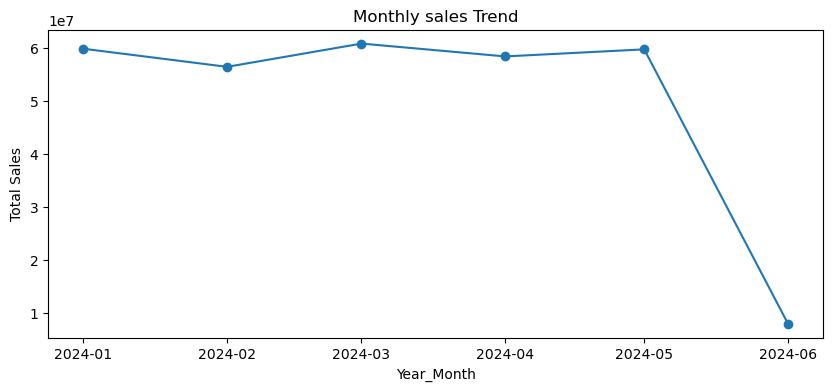

In [27]:
# Monthly sales trend (Line chart)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
plt.plot(monthly_sales['Year_Month'],monthly_sales['Total Sales'],marker='o')
plt.title('Monthly sales Trend')
plt.xlabel('Year_Month')
plt.ylabel('Total Sales')
plt.show()

In [28]:
# best and worst month performing
best_month= monthly_sales.loc[monthly_sales['Total Sales'].idxmax()]
worst_month= monthly_sales.loc[monthly_sales['Total Sales'].idxmin()]


In [29]:
best_month,worst_month

(Purchase Year                    2024
 Purchase Month                      3
 Total Sales               60750883.75
 Year_Month        2024-03-01 00:00:00
 Name: 2, dtype: object,
 Purchase Year                    2024
 Purchase Month                      6
 Total Sales                7911581.62
 Year_Month        2024-06-01 00:00:00
 Name: 5, dtype: object)

In [30]:
# yearly sales analysis
yearly_sales = ( df.groupby('Purchase Year')['Total Sales'].sum().reset_index())
yearly_sales

,Purchase Year,Total Sales
0,2024,3.027927e+08


In [31]:
# peak purchase time
hourly_sales = df.groupby('Hour')['Total Sales'].sum().reset_index()

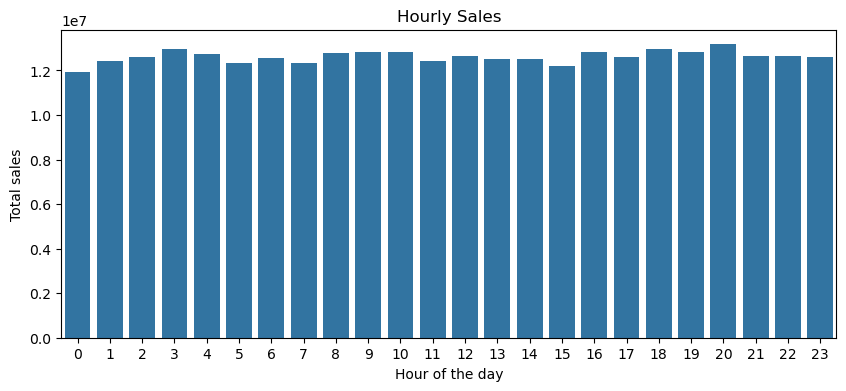

In [32]:
plt.figure(figsize =(10,4))
sns.barplot( data = hourly_sales , x = 'Hour', y = 'Total Sales')
plt.title('Hourly Sales')
plt.xlabel('Hour of the day')
plt.ylabel('Total sales')
plt.show()

In [33]:
day_sales = df.groupby('Purchase Day')['Total Sales'].sum().reset_index()
order = ['Monday','Tuesday','Wednesday','Thursdsy','Friday','Saturday','Sunday']

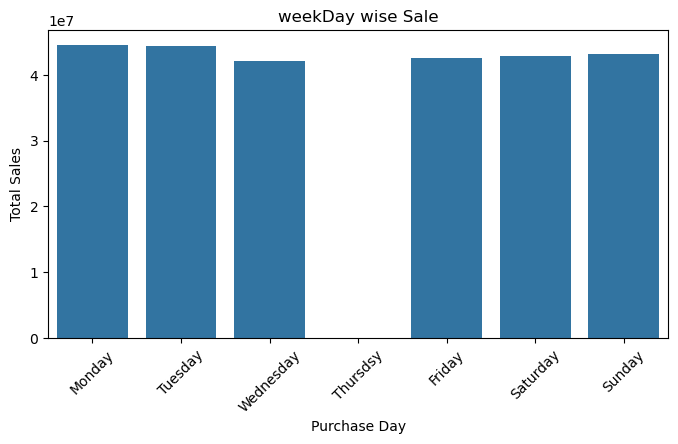

In [34]:
plt.figure(figsize = (8,4))
sns.barplot(data = day_sales, x = 'Purchase Day' , y= 'Total Sales', order = order)
plt.title('weekDay wise Sale')
plt.xticks(rotation=45)
plt.show()

In [35]:
# top category sales
category_sales = df.groupby('Category')['Total Sales'].sum().reset_index()
category_sales = category_sales.sort_values('Total Sales', ascending=False)

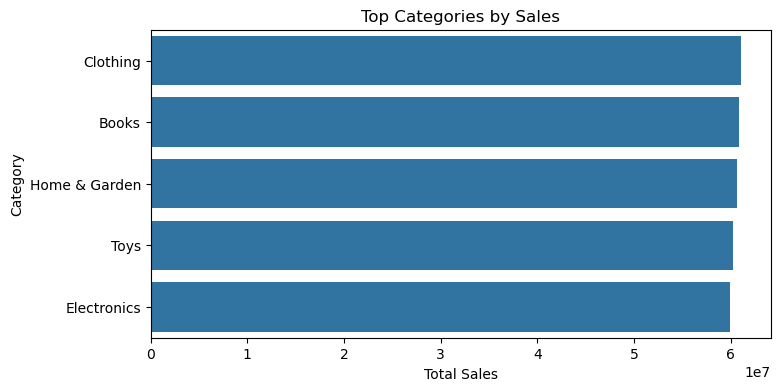

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(data=category_sales, x='Total Sales', y='Category')

plt.title('Top Categories by Sales')
plt.show()

In [37]:
# top product sales
category_sales = df.groupby('Product Name')['Total Sales'].sum().reset_index()
category_sales = category_sales.sort_values('Total Sales', ascending=False).head(10)

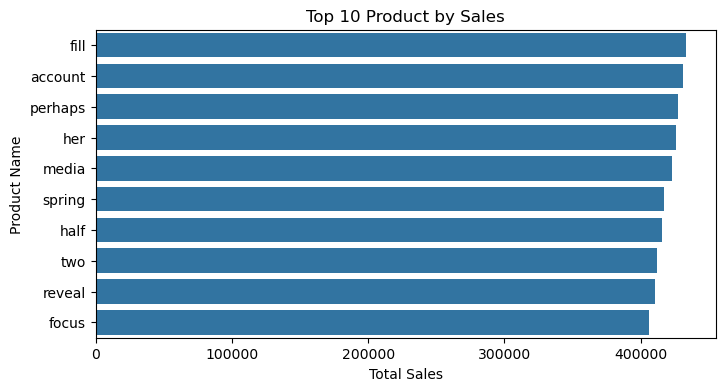

In [38]:
plt.figure(figsize=(8,4))
sns.barplot(data=category_sales, x='Total Sales', y='Product Name')

plt.title('Top 10 Product by Sales')
plt.show()

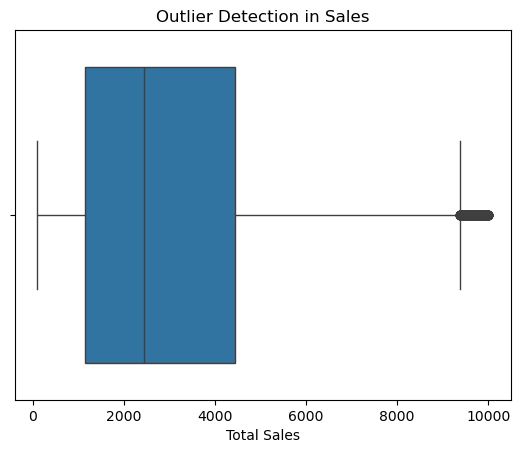

In [39]:
# outlier check
sns.boxplot(x=df['Total Sales'])
plt.title('Outlier Detection in Sales')
plt.show()

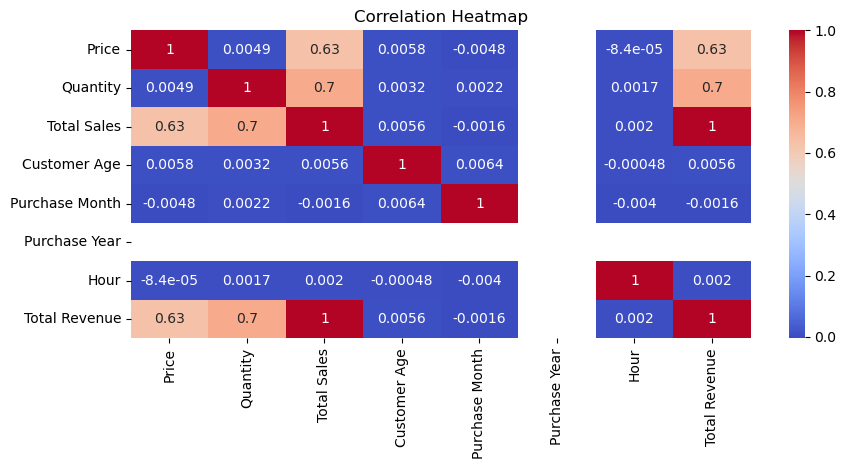

In [40]:
# correlation check
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(10,4))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Cleaning and Preprocessing
- Converted purchase time to datetime format
- Extracted year, month, day, and hour features
- Handled missing values
- Created time bins for purchase behavior analysis

##  Exploratory Data Analysis
EDA was performed to understand sales distribution, temporal trends, and category-level performance using visualizations.

##  Sales Trend Analysis
- Yearly sales analysis using bar charts
- Monthly sales trend to identify seasonality
- Hourly and day-wise sales behavior analysis

  ##  Product and Category Analysis
Top-performing product categories were identified based on total sales contribution, helping understand revenue drivers.

##  Outlier Analysis
Boxplot analysis revealed the presence of high-value outliers, representing bulk or premium purchases rather than data errors.

##  Correlation Analysis
Correlation analysis showed strong positive relationships between total sales and quantity, and moderate correlation with price, while demographic variables showed minimal influence.

##  Key Insights
- Sales peak during specific months indicating seasonal demand
- Quantity has the strongest impact on total sales
- Certain categories contribute disproportionately to revenue
- High-value orders form a small but important segment

## Business Recommendations
- Focus inventory on high-performing categories
- Target high-value customers with loyalty programs
- Run promotions during peak sales periods
- Encourage bulk purchases through discounts

----------------------------------
## ***RFM ANALYSIS AND Customer Segmentation***
----------------------------------

RFM analysis is used to segment customers based on their purchasing behavior:
- Recency: Days since the customer's last purchase
- Frequency: Total number of purchases made
- Monetary: Total revenue generated by the customer

In [41]:
reference_date = df['Purchase Date'].max()+pd.Timedelta(days=1)
reference_date

Timestamp('2024-06-05 00:00:00')

In [42]:
rfm = df.groupby('Customer ID').agg({'Purchase Date' : lambda x: (reference_date - x.max()).days,'Order ID':'count','Total Sales':'sum'}).reset_index()

In [43]:
rfm

,Customer ID,Purchase Date,Order ID,Total Sales
0,000300b1-0eaf-4ace-9aaf-067f2e4f8ce1,99,1,2514.10
1,00041160-9942-455f-833b-20e26dcd16de,128,1,799.22
2,00052fdc-36b6-49a2-b629-aab5e52f5f19,101,1,637.03
3,00059c43-6da9-4d68-837e-08adf003a2e4,95,1,2330.44
4,00065815-8092-4cc6-9fb4-1b2cbdbebe51,86,1,2479.20
...,...,...,...,...
99995,fffd06d4-e02e-4792-a68c-9e842af08bde,32,1,6338.57
99996,fffd7824-6a2a-40ea-9d43-c7d8dc155f12,30,1,1529.76
99997,fffd94e2-18da-42ea-ae13-030747e6bb49,54,1,4526.95
99998,fffe5ebf-6ea2-4cb4-95c3-b51266b0931d,137,1,1518.10


In [44]:
# frequency for each customer is 1 (data limitations) so we will do only RM analysis

rfm.columns = ['Customer ID','Recency','Frequency','Monetary']
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,000300b1-0eaf-4ace-9aaf-067f2e4f8ce1,99,1,2514.10
1,00041160-9942-455f-833b-20e26dcd16de,128,1,799.22
2,00052fdc-36b6-49a2-b629-aab5e52f5f19,101,1,637.03
3,00059c43-6da9-4d68-837e-08adf003a2e4,95,1,2330.44
4,00065815-8092-4cc6-9fb4-1b2cbdbebe51,86,1,2479.20


In [45]:
rfm['R_score'] = pd.qcut(rfm['Recency'],4, labels=[4,3,2,1])
rfm['M_score'] = pd.qcut(rfm['Monetary'],4, labels=[1,2,3,4])

rfm['RM_score'] = rfm['R_score'] 
rfm['RM_score']=rfm['M_score']

In [46]:
def rm_segment(row):
    if row['RM_score'] in [44,43]:
        return 'High-Value Recent Customer'
    elif row['R_score'] >=3:
        return ' Recent Customer'
    elif row['M_score'] >= 3:
        return ' Higher Spending Customer'
    else:
        return ' Low Value Customer'

rfm['segment'] = rfm.apply(rm_segment,axis=1)
rfm['segment'].value_counts()

segment
Recent Customer             50125
Higher Spending Customer    24952
Low Value Customer          24923
Name: count, dtype: int64

In [47]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R_score,M_score,RM_score,segment
0,000300b1-0eaf-4ace-9aaf-067f2e4f8ce1,99,1,2514.10,2,3,3,Higher Spending Customer
1,00041160-9942-455f-833b-20e26dcd16de,128,1,799.22,1,1,1,Low Value Customer
2,00052fdc-36b6-49a2-b629-aab5e52f5f19,101,1,637.03,2,1,1,Low Value Customer
3,00059c43-6da9-4d68-837e-08adf003a2e4,95,1,2330.44,2,2,2,Low Value Customer
4,00065815-8092-4cc6-9fb4-1b2cbdbebe51,86,1,2479.20,2,3,3,Higher Spending Customer


In [48]:
rfm.groupby('segment').agg({'Customer ID':'count','Monetary':'mean','Frequency':'mean'}).reset_index()

,segment,Customer ID,Monetary,Frequency
0,Higher Spending Customer,24952,4842.255826,1.0
1,Low Value Customer,24923,1217.736727,1.0
2,Recent Customer,50125,3024.818960,1.0


(array([0, 1, 2]),
 [Text(0, 0, ' Recent Customer'),
  Text(1, 0, ' Higher Spending Customer'),
  Text(2, 0, ' Low Value Customer')])

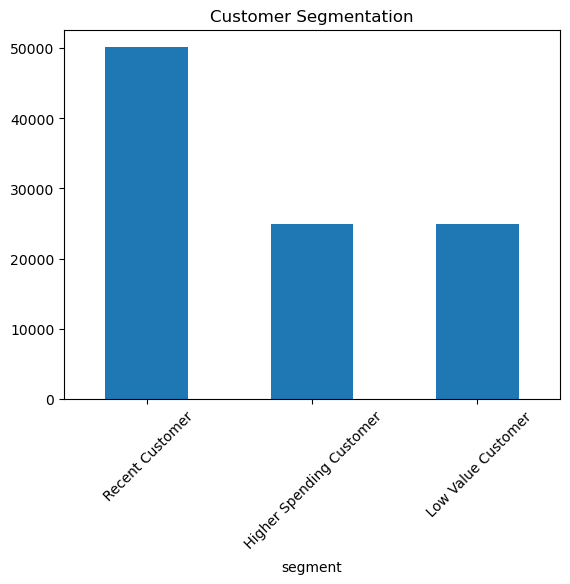

In [49]:
rfm['segment'].value_counts().plot(kind = 'bar', title = 'Customer Segmentation')
plt.xticks(rotation = 45)

<Axes: ylabel='Monetary'>

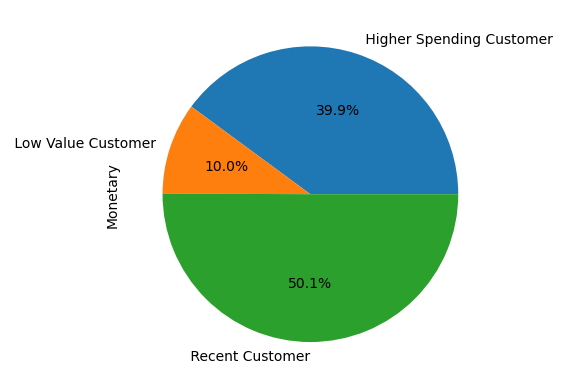

In [50]:
rfm.groupby('segment')['Monetary'].sum().plot(kind='pie', autopct='%1.1f%%')

In [51]:
rfm.to_csv('Ecommerce_rfm.csv',index = False)

### RFM analysis was performed to segment customers based on:
- Recency: How recently a customer made a purchase
- Frequency: How often they purchased
- Monetary: How much they spent

Customers were divided into meaningful segments such as
High-Value, Recent, and Low-Value customers.
- High-Value customers contribute the highest revenue.
- Recent customers show potential for retention.
- Low-Value customers require promotional strategies.

### Conclusion
The analysis provides actionable insights into customer behavior
and sales performance. These findings can support data-driven
decision making and targeted marketing strategies.

## Time Series Analysis

In [53]:
monthly_sales = (
    df.set_index('Purchase Date')
      .resample('ME')['Total Sales']
      .sum()
      .reset_index()
)                                    # we used'ME' instead of "M" bcz M will be replaced with ME in future version

# Daily sales were highly volatile, therefore monthly aggregation was used to better capture the overall trend.

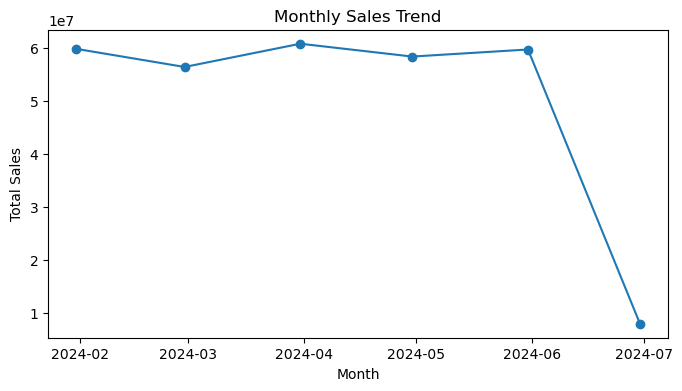

In [54]:
plt.figure(figsize=(8,4))
plt.plot(monthly_sales['Purchase Date'], monthly_sales['Total Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

## Using MOVING AVERAGE FORECAST 
* Moving average smooths short-term fluctuations
* Helps identify underlying trend
* Suitable for short & noisy datasets

In [55]:
monthly_sales['MA_3'] = monthly_sales['Total Sales'].rolling(window=3).mean()

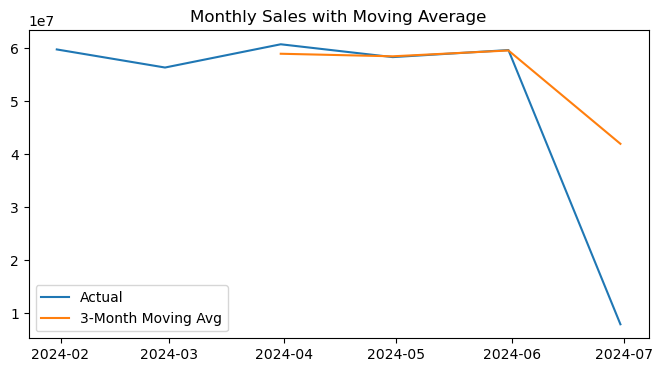

In [56]:
plt.figure(figsize=(8,4))
plt.plot(monthly_sales['Purchase Date'], monthly_sales['Total Sales'], label='Actual')
plt.plot(monthly_sales['Purchase Date'], monthly_sales['MA_3'], label='3-Month Moving Avg')
plt.legend()
plt.title('Monthly Sales with Moving Average')
plt.show()

In [57]:
# simple next-Month forecast

next_month_forecast = monthly_sales['Total Sales'].tail(3).mean()
next_month_forecast

np.float64(41966851.916666664)

In [58]:
monthly_sales.to_csv('monthly_sales_forecast.csv', index=False)

In [59]:
monthly_sales

,Purchase Date,Total Sales,MA_3
0,2024-01-31,59778158.05,NaN
1,2024-02-29,56363072.63,NaN
2,2024-03-31,60750883.75,5.896404e+07
3,2024-04-30,58328508.11,5.848082e+07
4,2024-05-31,59660466.02,5.957995e+07
5,2024-06-30,7911581.62,4.196685e+07


In [61]:
# forecasting for next 6 months
import pandas as pd

last_date = monthly_sales['Purchase Date'].max()

future_dates = pd.date_range(
    start=last_date + pd.offsets.MonthEnd(1),
    periods=6,
    freq='ME'
)

In [63]:
forecast_df = pd.DataFrame({
    'Purchase Date': future_dates,
    'Forecasted Sales': next_month_forecast
})

# assigning new values for forecast

In [64]:
# combining both
combined_df = pd.concat([
    monthly_sales[['Purchase Date', 'Total Sales']].rename(
        columns={'Total Sales': 'Sales'}
    ),
    forecast_df.rename(columns={'Forecasted Sales': 'Sales'})
])

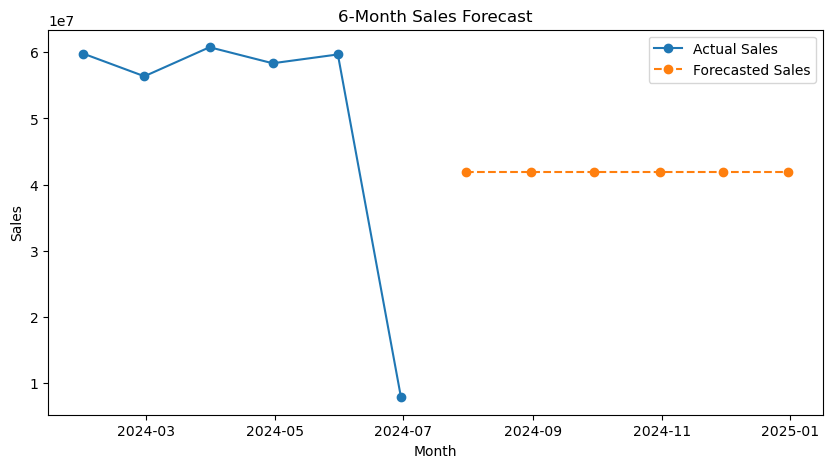

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    monthly_sales['Purchase Date'],
    monthly_sales['Total Sales'],
    marker='o',
    label='Actual Sales'
)

plt.plot(
    forecast_df['Purchase Date'],
    forecast_df['Forecasted Sales'],
    marker='o',
    linestyle='--',
    label='Forecasted Sales'
)

plt.title('6-Month Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [66]:
#A simple moving average–based forecasting approach was used due to limited historical data availability. 
#The forecast assumes stable sales behavior and provides a short-term estimate for the next six months.
#Advanced models were not applied to avoid overfitting.

forecast_df.to_csv('6_month_sales_forecast.csv', index=False)